In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime
import glob

In [2]:
def file_list(folder):
    files = glob.glob(folder)
    sample_names =[]
    for file in files:
        sample_names.append(file[:])
    
    return sample_names

sample_name1 = file_list("./data/2ko/drive/*.csv")
sample_name2 = file_list("./data/2ko/FOV/*.csv")

print(sample_name1)
print(sample_name2)

i, j = 1, 1

['./data/2ko/drive\\2022-12-09-10-48-11_ST2110610.csv', './data/2ko/drive\\2022-12-14-18-05-16_SB2110303.csv']
['./data/2ko/FOV\\2022-12-09-11-04-06_FOV_ST2110610.csv', './data/2ko/FOV\\2022-12-14-19-14-56_FOV_SB2110303.csv']


In [3]:
# file
file_drive = sample_name1[i]
df1 = pd.read_csv(file_drive, index_col=0)
sample_name = file_drive[-28:-4]
print(sample_name)
df1.head()

12-14-18-05-16_SB2110303


,Time,humidity,temperature,vpp_sum1,vpp_sum2,delay_slow,delay_fast,delay_pp_slow,delay_pp_fast,Ch1_word,Ch2_word,Ch1_Amp,Ch2_Amp
0,2022/12/14 18:05:18,17.233276,28.173904,573358.0,1186908.0,3978.782075,1498.683251,0.0,0.0,3.223298e+15,1.608445e+15,13.9,13.8
1,2022/12/14 18:05:20,17.225647,28.251343,579071.0,1204001.0,3980.941334,1498.020287,0.0,0.0,3.223293e+15,1.608442e+15,13.9,13.8
2,2022/12/14 18:05:22,17.167664,28.302078,571265.0,1186674.0,4016.835240,1503.990035,0.0,0.0,3.223287e+15,1.608440e+15,13.9,13.8
3,2022/12/14 18:05:24,17.138672,28.371506,579552.0,1206373.0,4043.238960,1507.018420,0.0,0.0,3.223278e+15,1.608435e+15,13.9,13.8
4,2022/12/14 18:05:25,17.089844,28.483658,570471.0,1186301.0,4051.782889,1504.907613,0.0,0.0,3.223266e+15,1.608429e+15,13.9,13.8


In [4]:
# file
file_drive =  sample_name2[j]
df2 = pd.read_csv(file_drive, index_col=0)
df2.head()

,Time,-x,+x,2x,-y,+y,2y
0,2022/12/14 18:03:20,-30.927925,30.894427,61.822352,-19.949632,21.380654,41.330285
1,2022/12/14 18:03:22,-30.927925,30.894427,61.822352,-19.949632,21.380654,41.330285
2,2022/12/14 18:03:23,-30.927925,30.894427,61.822352,-19.901206,21.380654,41.281859
3,2022/12/14 18:03:24,-30.927925,30.894427,61.822352,-19.949632,21.380654,41.330285
4,2022/12/14 18:03:25,-30.927925,30.894427,61.822352,-19.949632,21.380654,41.330285


In [5]:
time1 = pd.to_datetime(df1["Time"]) 
time1 = time1.dt.round("s")

time2 = pd.to_datetime(df2["Time"]) 
time2 = time2.dt.round("s")

time1[len(time1)-1]

Timestamp('2022-12-14 19:16:18')

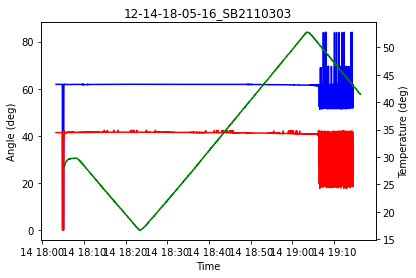

In [6]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.set_xlabel("Time")
ax1.set_ylabel("Angle (deg)")
ax2.set_ylabel("Temperature (deg)")
plt.title(sample_name)

xmin = time1[0]
xmax =time1[len(time1)-1]

#plt.xlim([xmin,xmax])
ax1.set_xticks([xmin, xmax]) 
ax1.set_xticklabels([xmin.time(), xmax.time()])
#ax1.set_ylim(0,60)
#ax2.set_ylim(10,40)

ax1.plot(time2, df2["2x"], color='b')
ax1.plot(time2, df2["2y"], color='r')
ax2.plot(time1, df1["temperature"], color='g')

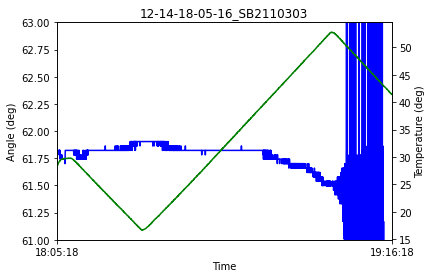

In [17]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.set_xlabel("Time")
ax1.set_ylabel("Angle (deg)")
ax2.set_ylabel("Temperature (deg)")
plt.title(sample_name)

xmin = time1[0]
xmax =time1[len(time1)-1]

plt.xlim([xmin,xmax])
ax1.set_xticks([xmin, xmax]) 
ax1.set_xticklabels([xmin.time(), xmax.time()])
ax1.set_ylim(61,63)
#ax2.set_ylim(10,40)

ax1.plot(time2, df2["2x"], color='b')
ax1.plot(time2, df2["2y"], color='r')
ax2.plot(time1, df1["temperature"], color='g')

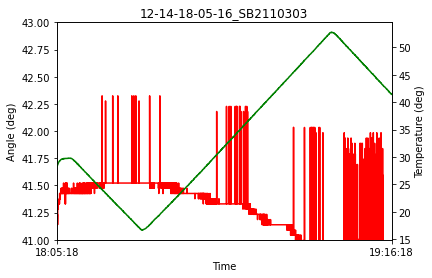

In [18]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.set_xlabel("Time")
ax1.set_ylabel("Angle (deg)")
ax2.set_ylabel("Temperature (deg)")
plt.title(sample_name)

xmin = time1[0]
xmax =time1[len(time1)-1]

plt.xlim([xmin,xmax])
ax1.set_xticks([xmin, xmax]) 
ax1.set_xticklabels([xmin.time(), xmax.time()])
ax1.set_ylim(41,43)
#ax2.set_ylim(10,40)

ax1.plot(time2, df2["2x"], color='b')
ax1.plot(time2, df2["2y"], color='r')
ax2.plot(time1, df1["temperature"], color='g')

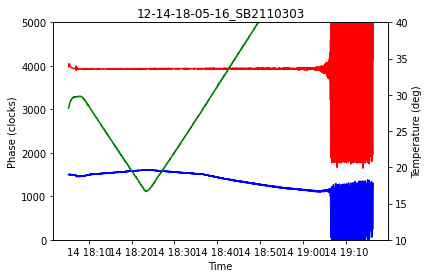

In [9]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.set_xlabel("Time")
ax1.set_ylabel("Phase (clocks)")
ax2.set_ylabel("Temperature (deg)")
plt.title(sample_name)

xmin = time1[0]
xmax =time1[len(time1)-1]
#plt.xlim([xmin,xmax])

ax1.set_xticks([xmin, xmax]) 
ax1.set_xticklabels([xmin.time(), xmax.time()])
ax1.set_ylim(0,5000)
ax2.set_ylim(10,40)

ax1.plot(time1, df1["delay_fast"], color='b')
ax1.plot(time1, df1["delay_slow"], color='r')
ax2.plot(time1, df1["temperature"], color='g')

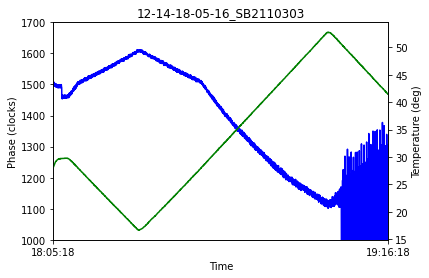

In [20]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.set_xlabel("Time")
ax1.set_ylabel("Phase (clocks)")
ax2.set_ylabel("Temperature (deg)")
plt.title(sample_name)

xmin = time1[0]
xmax =time1[len(time1)-1]

plt.xlim([xmin,xmax])
ax1.set_xticks([xmin, xmax]) 
ax1.set_xticklabels([xmin.time(), xmax.time()])
ax1.set_ylim(1000,1700)
#ax2.set_ylim(10,40)

ax1.plot(time1, df1["delay_fast"], color='b')
#ax1.plot(time1, df1["delay_slow"], color='r')
ax2.plot(time1, df1["temperature"], color='g')

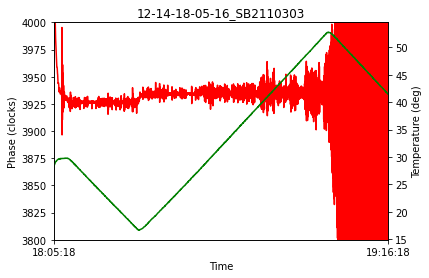

In [23]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.set_xlabel("Time")
ax1.set_ylabel("Phase (clocks)")
ax2.set_ylabel("Temperature (deg)")
plt.title(sample_name)

xmin = time1[0]
xmax =time1[len(time1)-1]

plt.xlim([xmin,xmax])
ax1.set_xticks([xmin, xmax]) 
ax1.set_xticklabels([xmin.time(), xmax.time()])
ax1.set_ylim(3800,4000)
#ax2.set_ylim(10,40)

#ax1.plot(time1, df1["delay_fast"], color='b')
ax1.plot(time1, df1["delay_slow"], color='r')
ax2.plot(time1, df1["temperature"], color='g')

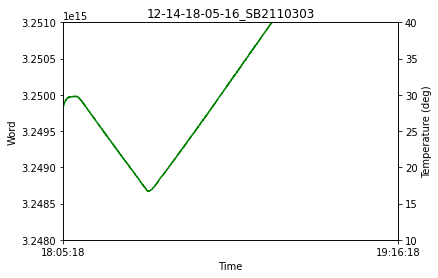

In [12]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.set_xlabel("Time")
ax1.set_ylabel("Word")
ax2.set_ylabel("Temperature (deg)")
plt.title(sample_name)

xmin = time1[0]
xmax =time1[len(time1)-1]

plt.xlim([xmin,xmax])
ax1.set_xticks([xmin, xmax]) 
ax1.set_xticklabels([xmin.time(), xmax.time()])
ax1.set_ylim(3.248e15,3.251e15)
ax2.set_ylim(10,40)

ax1.plot(time1, df1["Ch1_word"], color='b')
ax1.plot(time1, df1["Ch2_word"], color='r')
ax2.plot(time1, df1["temperature"], color='g')

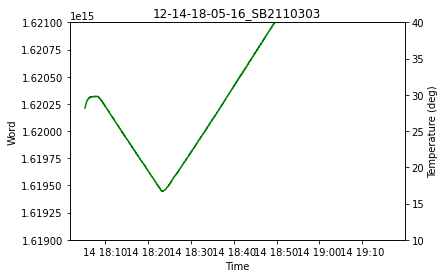

In [13]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.set_xlabel("Time")
ax1.set_ylabel("Word")
ax2.set_ylabel("Temperature (deg)")
plt.title(sample_name)

xmin = time1[0]
xmax =time1[len(time1)-1]

#plt.xlim([xmin,xmax])
ax1.set_xticks([xmin, xmax]) 
ax1.set_xticklabels([xmin.time(), xmax.time()])
ax1.set_ylim(1.619e15,1.621e15)
ax2.set_ylim(10,40)

#ax1.plot(time1, df1["Ch1_word"], color='b')
ax1.plot(time1, df1["Ch2_word"], color='r')
ax2.plot(time1, df1["temperature"], color='g')

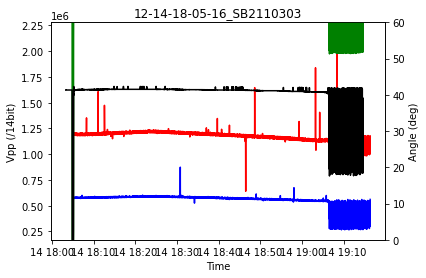

In [14]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.set_xlabel("Time")
ax1.set_ylabel("Vpp (/14bit)")
ax2.set_ylabel("Angle (deg)")
plt.title(sample_name)

xmin = time1[0]
xmax =time1[len(time1)-1]
#plt.xlim([xmin,xmax])

ax1.set_xticks([xmin, xmax]) 
ax1.set_xticklabels([xmin.time(), xmax.time()])
#ax1.set_ylim(0,5000)
ax2.set_ylim(0,60)

ax1.plot(time1, df1["vpp_sum1"], color='b')
ax1.plot(time1, df1["vpp_sum2"], color='r')
ax2.plot(time2, df2["2x"], color='g')
ax2.plot(time2, df2["2y"], color='k')

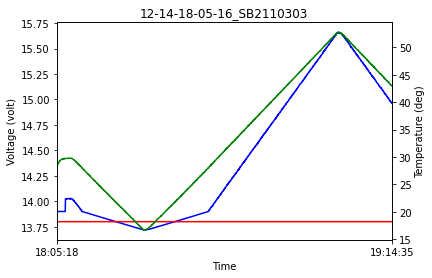

In [26]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.set_xlabel("Time")
ax1.set_ylabel("Voltage (volt)")
ax2.set_ylabel("Temperature (deg)")
plt.title(sample_name)

xmin = time1[0]
xmax = time2[len(time2)-1]

plt.xlim([xmin,xmax])
ax1.set_xticks([xmin, xmax]) 
ax1.set_xticklabels([xmin.time(), xmax.time()])
#ax1.set_ylim(3.242e15,3.245e15)
#ax2.set_ylim(10,40)

ax1.plot(time1, df1["Ch1_Amp"], color='b')
ax1.plot(time1, df1["Ch2_Amp"], color='r')
ax2.plot(time1, df1["temperature"], color='g')
#ax2.plot(time3, df3["temperature"], color='orange')
#ax2.plot(time3, df3["set_temperature"], color='b')